**Load the Dataset**

In [5]:
!pip install tensorflow matplotlib

In [7]:
# Importing required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the images to add a channel dimension (for consistency)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Dataset Loaded: {x_train.shape[0]} training samples, {x_test.shape[0]} test samples")


Dataset Loaded: 60000 training samples, 10000 test samples


**Create the MLP Models**

In [8]:
# Function to create an MLP model with optional Batch Normalization & Dropout
def create_mlp(hidden_layers=2, neurons=128, dropout_rate=0.2, batch_norm=False):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Flatten 28x28 images into a vector

    for _ in range(hidden_layers):
        model.add(layers.Dense(neurons, activation='relu'))
        if batch_norm:
            model.add(layers.BatchNormalization())  # Improves stability
        model.add(layers.Dropout(dropout_rate))  # Reduces overfitting

    model.add(layers.Dense(10, activation='softmax'))  # Output layer for classification

    return model

**Train the Models**

In [9]:
# Define hyperparameters for each model
models = {
    "2-layer MLP": create_mlp(hidden_layers=2, neurons=128, dropout_rate=0.2, batch_norm=True),
    "4-layer MLP": create_mlp(hidden_layers=4, neurons=256, dropout_rate=0.3, batch_norm=True)
}

# Store training history for comparison
results = {}

# Train each model
for name, model in models.items():
    print(f"\nTraining {name}...\n")
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=15, batch_size=32, verbose=1)
    results[name] = history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training 2-layer MLP...

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8497 - loss: 0.4878 - val_accuracy: 0.9614 - val_loss: 0.1293
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9432 - loss: 0.1883 - val_accuracy: 0.9686 - val_loss: 0.0995
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9545 - loss: 0.1484 - val_accuracy: 0.9730 - val_loss: 0.0902
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9620 - loss: 0.1232 - val_accuracy: 0.9762 - val_loss: 0.0788
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9644 - loss: 0.1145 - val_accuracy: 0.9779 - val_loss: 0.0722
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9694 - loss: 0.1011 - val_accuracy: 0.9769 - val_loss: 0.0749
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9694 - loss: 0.0968 - val_accuracy: 0.9769 - val_loss: 0.0705
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - 

**Visualize the Performance**

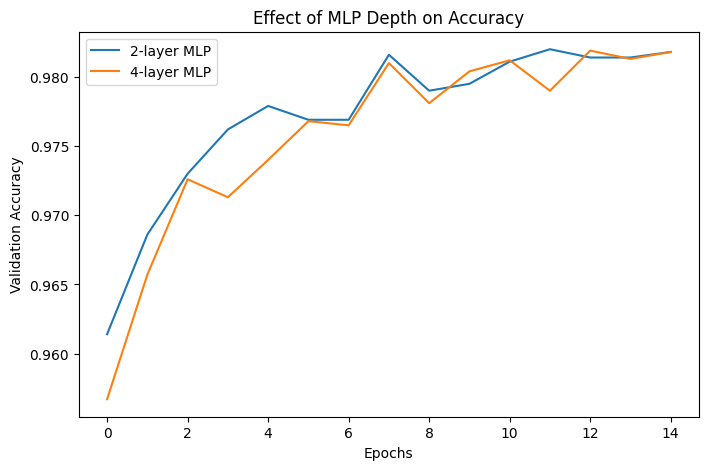

In [12]:
# Plot validation accuracy over epochs
plt.figure(figsize=(8, 5))
for name, history in results.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Effect of MLP Depth on Accuracy")
plt.legend()
plt.show()


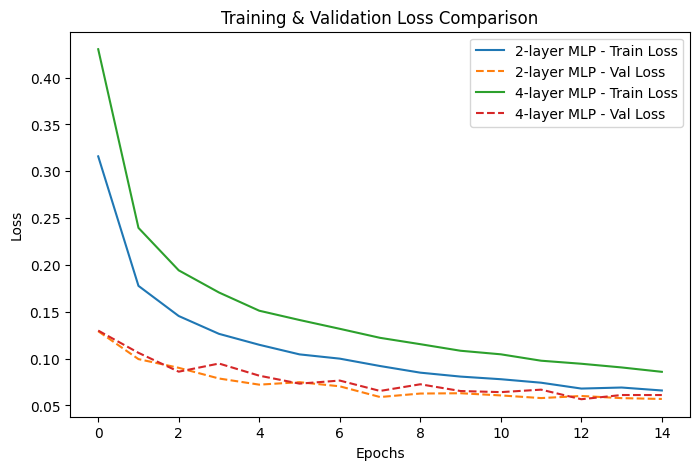

In [13]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
for name, history in results.items():
    plt.plot(history.history['loss'], label=f"{name} - Train Loss")
    plt.plot(history.history['val_loss'], linestyle="dashed", label=f"{name} - Val Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Comparison")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


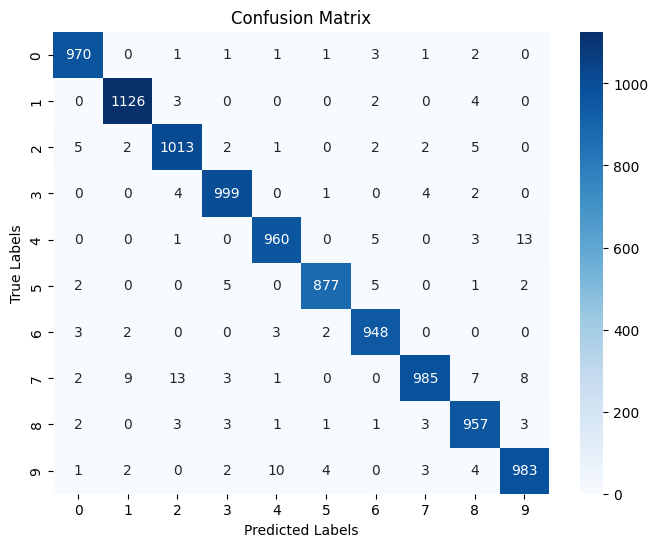

In [14]:
# Evaluate the best model (deeper MLP)
best_model = models["4-layer MLP"]
y_pred = np.argmax(best_model.predict(x_test), axis=1)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


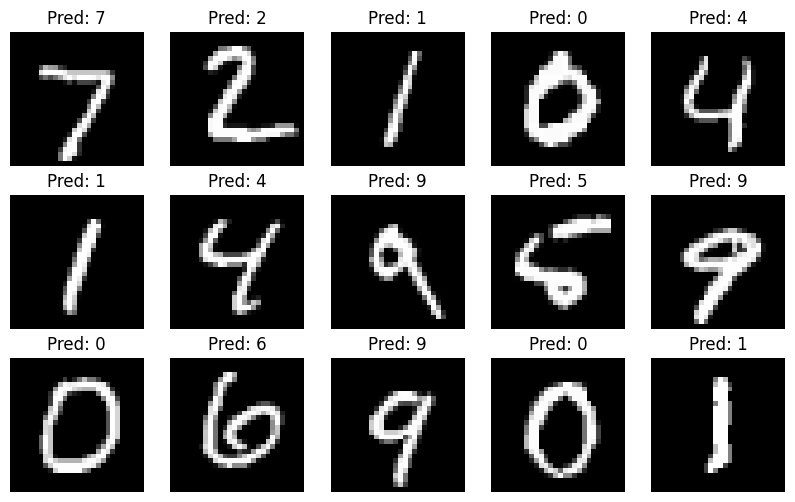

In [15]:
# Display some predictions
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()

for i in range(15):
    img = x_test[i].reshape(28, 28)
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Pred: {y_pred[i]}")
    axes[i].axis("off")

plt.show()